# Initial Setups

Thank you for registering!
Hi hnmusac, 

Below you can find your personal token:

Oa2107-0d9411hH05-11084f20

This token will be required to submit your predictions.
Please remember, this code is personal, so do not share it with anyone.
Good luck!

## autoreload

In [1]:
# %load_ext autoreload
# %autoreload 2

## dir setup

In [2]:
from dotenv import load_dotenv, find_dotenv
import os

this_file_path = os.path.dirname(os.path.abspath("__file__"))
# if script (not notebook)...
# project_dir = os.path.join(os.path.dirname(__file__), os.pardir)

# project directory
project_dir = os.path.join(this_file_path, os.pardir)

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [3]:
raw_data_dir = os.path.join(project_dir, os.environ.get("RAW_DATA_DIR"))
processed_data_dir = os.path.join(project_dir, os.environ.get("PROCESSED_DATA_DIR"))
figures_data_dir = os.path.join(project_dir, os.environ.get("FIGURES_DATA_DIR"))
reports_data_dir = os.path.join(project_dir, os.environ.get("REPORTS_DATA_DIR"))

## imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import sweetviz as sv
# import utils

In [5]:
# pd.set_option('max_rows', None)

In [127]:
# from tqdm import tqdm

### item_data.jl.gz

In [7]:
item_data_fn = 'item_data.jl.gz'
item_data = pd.read_json(os.path.join(raw_data_dir, item_data_fn), lines=True)

### train_dataset.jl.gz

In [8]:
%%time
train_fn = 'train_dataset.pkl'
train_fp = os.path.join(processed_data_dir, train_fn)
train = pd.read_pickle(train_fp)
    
train.item_bought = train.item_bought.fillna(method = 'backfill').astype(int)
train['in_nav'] = train.item_bought == train.event_info

CPU times: user 4.26 s, sys: 784 ms, total: 5.04 s
Wall time: 5.13 s


### test_dataset.jl.gz

In [7]:
%%time
test_fn = 'test_dataset.pkl'
test_fp = os.path.join(processed_data_dir, test_fn)
test = pd.read_pickle(test_fp)

CPU times: user 1.28 s, sys: 422 ms, total: 1.71 s
Wall time: 1.74 s


* baseline prediction 1

In [103]:
pred_1_fn = 'pred_1.csv'

In [100]:
pred = test[test.event_type == 'view']
pred = pred.groupby('seq').event_info.value_counts()
pred.name = 'counts'
pred = pred.reset_index()
pred['rank'] = pred.groupby('seq')['counts'].transform(lambda x: range(len(x)))
pred = pred[pred['rank'] < 10]
pred = pred.pivot(index = 'seq', columns = 'rank', values = 'event_info')

In [100]:
pred = pred.fillna(axis = 1, method = 'ffill').astype(int)
pred = pred.reindex(index = range(177070))
most_frequent = pred.stack().value_counts().index[0]
pred.fillna(most_frequent, inplace = True)
pred = pred.astype(int)

In [103]:
pred_1_fp = os.path.join(reports_data_dir, pred_1_fn)
pred.to_csv(pred_1_fp, header = None, index = None)

* baseline prediction 2

In [149]:
pred_2 = test[test.event_type == 'view']
pred_2 = pred_2.groupby('seq').event_info.value_counts()
pred_2.name = 'counts'

In [151]:
pred_2 = pred_2.reset_index()
pred_2['rank'] = pred_2.groupby('seq')['counts'].transform(lambda x: range(len(x)))
pred_2 = pred_2[pred_2['rank'] < 10]
pred_2 = pred_2.pivot(index = 'seq', columns = 'rank', values = 'event_info')
pred_2 = pred_2.reindex(index = range(177070))

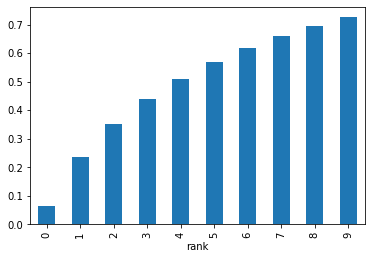

In [152]:
pred_2.isnull().mean().plot(kind = "bar");

In [153]:
pred_2.isnull().stack().value_counts(normalize = True)

False    0.513686
True     0.486314
dtype: float64

In [154]:
pred_2.isnull().all(axis = 1).mean()

0.06421189360140057

In [155]:
pred_2[10] = pred_2[0]
pred_2 = pred_2.fillna(axis = 1, method = 'bfill')
pred_2.drop(10, axis = 1, inplace = True)

In [157]:
most_frequent = pred_2.stack().value_counts().index[0]
pred_2.fillna(most_frequent, inplace = True)
pred_2 = pred_2.astype(int)

In [158]:
pred_2_fn = 'pred_2.csv'
pred_2_fp = os.path.join(reports_data_dir, pred_2_fn)
pred_2.to_csv(pred_2_fp, header = None, index = None)

* baseline prediction 3

In [160]:
pred_3_fn = 'pred_3.csv'

In [100]:
pred = test[test.event_type == 'view']
pred = pred.groupby('seq').event_info.value_counts()
pred.name = 'counts'
pred = pred.reset_index()
pred['rank'] = pred.groupby('seq')['counts'].transform(lambda x: range(len(x)))
pred = pred[pred['rank'] < 10]
pred = pred.pivot(index = 'seq', columns = 'rank', values = 'event_info')

In [100]:
pred = pred.fillna(axis = 1, method = 'ffill').astype(int)
pred = pred.reindex(index = range(177070))
most_frequent = pred.stack().value_counts().index[0]
pred.fillna(most_frequent, inplace = True)
pred = pred.astype(int)

In [103]:
pred_3_fp = os.path.join(reports_data_dir, pred_3_fn)
pred.to_csv(pred_3_fp, header = None, index = None)

### sample_submission.csv

In [25]:
sample_fn = 'sample_submission.csv'
sample_fp = os.path.join(reports_data_dir, sample_fn)
sample = pd.read_csv(sample_fp, header = None)

In [26]:
sample

,0,1,2,3,4,5,6,7,8,9
0,654238,781750,558980,663439,1397720,1095079,798751,1141944,411021,138117
1,462167,1511283,928291,1907892,66135,54134,1090655,700291,63494,613724
2,2092880,1974491,1687910,371918,1659351,156119,578171,1407298,1378300,500637
3,614011,509284,181629,1544217,267392,409673,755307,1621679,767644,617841
4,2056298,1707393,449955,192999,1424465,1220223,101358,1281863,1222898,1871900
...,...,...,...,...,...,...,...,...,...,...
177065,281333,1771249,755106,1897538,149734,712824,1498148,2044243,1900076,1419004
177066,151705,351222,511891,1496225,927190,1389743,91996,1314267,2012574,600
177067,800371,1355631,1591544,446190,465623,2050277,631944,350084,446335,1698822
177068,1083498,449422,1967277,788924,611734,984771,1323664,911307,1879004,304561


_____

* test_dataset.jl.gz